# 1) Import Libraries

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

# 2) Import Data

In [ ]:
#importing dataset
amazon_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#removing titles parts from dataset
amazon_data = amazon_data.dropna(axis = 0)

In [ ]:
#Displaying shape of data
amazon_data.shape

(78466, 6)

In [ ]:
#Printing head(Top) data in dataset
amazon_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0


In [ ]:
#Taking only reviews and ratings column in dataset
amazon_data=amazon_data[["Reviews","Rating"]]

In [ ]:
#Printing head part of new data
amazon_data.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5.0
1,"nice phone, nice up grade from my pantach revu...",4.0
2,Very pleased,5.0
3,It works good but it goes slow sometimes but i...,4.0
4,Great phone to replace my lost phone. The only...,4.0


In [ ]:
#Considering 4 and 5 data as positive we have assigned it to positive variable
amazon_data_pos=amazon_data[amazon_data["Rating"].isin([4,5])]

In [ ]:
#printing positive data
amazon_data_pos.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5.0
1,"nice phone, nice up grade from my pantach revu...",4.0
2,Very pleased,5.0
3,It works good but it goes slow sometimes but i...,4.0
4,Great phone to replace my lost phone. The only...,4.0


In [ ]:
#printing bottom data in dataset
amazon_data_pos.tail()

,Reviews,Rating
102612,Always BlackBerry ...good Z30.,5.0
102614,It's excellent buy by Amazon and the items bought,5.0
102615,Awesome unlocked phone !! The potential of thi...,5.0
102616,"i like it very much,",5.0
102618,LOVED IT... THANK YOU GUYS,5.0


In [ ]:
#Considering 1,2 start reviews as negative we have assigned it to negative variable
amazon_data_neg=amazon_data[amazon_data["Rating"].isin([1,2])]

In [ ]:
# printing negative data head(top) data
amazon_data_neg.head()

,Reviews,Rating
5,I already had a phone with problems... I know ...,1.0
6,The charging port was loose. I got that solder...,2.0
7,"Phone looks good but wouldn't stay charged, ha...",2.0
13,I'm really disappointed about my phone and ser...,1.0
15,Had this phone before and loved it but was not...,2.0


In [ ]:
#  Printing bottom data of dataset
amazon_data_neg.tail()

,Reviews,Rating
102593,"I BOUGHT THE BBZ30, SUPPOSEDLY UNLOCKED TO USE...",1.0
102598,I didn't like this Phone as this was Too Slow ...,2.0
102609,Received the mobile phone with 2 major problem...,1.0
102613,Phone was not brand new. Came in a ragged crum...,1.0
102617,"its supoussed to be UNLOCKED, but the phone is...",1.0


In [ ]:
#Counting number of reviews by rating
amazon_data.Rating.value_counts()

5.0    46499
1.0    14443
4.0     9196
3.0     4560
2.0     3768
Name: Rating, dtype: int64

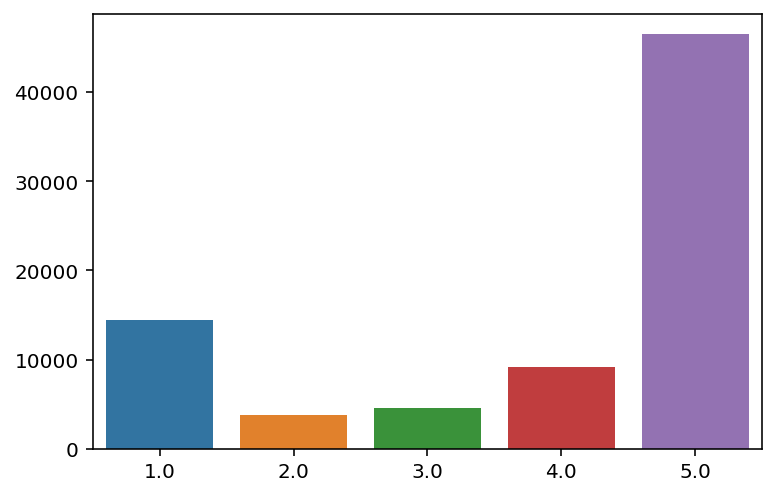

In [ ]:
# ploting it in bar graph
sns.barplot(x=amazon_data.Rating.value_counts().index,y=amazon_data.Rating.value_counts().values)

In [ ]:
#filtering 20000 positive and 20000 negative data from it to train model
amazon_data_filtered=pd.concat([amazon_data_pos[:20000],amazon_data_neg[:20000]])

In [ ]:
# Printing dataset shape
amazon_data_filtered.shape

(38211, 2)

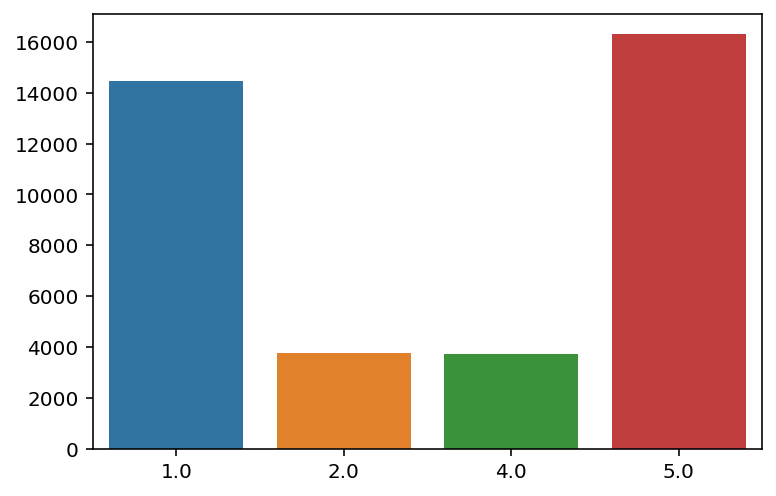

In [ ]:
# Ploting graph for new dataset
sns.barplot(x=amazon_data_filtered.Rating.value_counts().index,y=amazon_data_filtered.Rating.value_counts().values)

In [ ]:
# Adding r varible to dataset 
amazon_data_filtered["r"]=1

In [ ]:
# Making all 1,2 ratings as 0
amazon_data_filtered["r"][amazon_data_filtered["Rating"].isin([1,2])]= 0

In [ ]:
# printing data head
amazon_data_filtered.head()

,Reviews,Rating,r
0,I feel so LUCKY to have found this used (phone...,5.0,1
1,"nice phone, nice up grade from my pantach revu...",4.0,1
2,Very pleased,5.0,1
3,It works good but it goes slow sometimes but i...,4.0,1
4,Great phone to replace my lost phone. The only...,4.0,1


In [ ]:
# Printing tail part of data
amazon_data_filtered.tail()

,Reviews,Rating,r
102593,"I BOUGHT THE BBZ30, SUPPOSEDLY UNLOCKED TO USE...",1.0,0
102598,I didn't like this Phone as this was Too Slow ...,2.0,0
102609,Received the mobile phone with 2 major problem...,1.0,0
102613,Phone was not brand new. Came in a ragged crum...,1.0,0
102617,"its supoussed to be UNLOCKED, but the phone is...",1.0,0


In [ ]:
#  Counting 0,1 r data
amazon_data_filtered.r.value_counts()

1    20000
0    18211
Name: r, dtype: int64

# 3)Spilt Train And Test data

In [ ]:
#  imporing sklearn library
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting dataset into test and traing data 
X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(amazon_data_filtered["Reviews"],amazon_data_filtered["r"],test_size=0.2)

In [ ]:
# Printing head of Y train data
Y_train_data.head()

35646    1
10473    1
72745    0
20782    1
36575    0
Name: r, dtype: int64

In [ ]:
# Printing head of X train data
X_train_data.head()

35646                Excellent phone - in great condition.
10473                           Just what the hubs needed.
72745    It's not Brand New or sealed and nor a factory...
20782               Was delivered quickly and works great!
36575         it doesn't stay charge long I don't know why
Name: Reviews, dtype: object

# 4) Text Transformation


In [ ]:
# imporing library
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Crate vectorizer function
tfidf_vector = TfidfVectorizer(stop_words="english")

In [ ]:
# fit data into vector
tfidf_vector.fit(X_train_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
# printing first and last 20 data
print(tfidf_vector.get_feature_names()[0:20])
print(tfidf_vector.get_feature_names()[-20:])

['00', '000', '0000', '000mah', '002', '00emotional', '00now', '00pm', '00so', '00time', '01', '013435003182980', '014', '018633051660f', '02', '03', '04', '04th', '06', '07']
['zip', 'ziplock', 'zippy', 'zips', 'zmax', 'zone', 'zones', 'zoom', 'zoomed', 'zooming', 'zte', 'ítem', 'óptico', 'ünlocked', 'ýn', 'śo', '中国要用卡贴', '买来三天就被偷了not', '支持联通移动2g', '还不错']


In [ ]:
# Transforming data into vectors
X_train_data_new=tfidf_vector.transform(X_train_data)

In [ ]:
# Printing new shape of data
X_train_data_new.shape

(30568, 15356)

In [ ]:
#  trainforming test test data
x_test_data_new=tfidf_vector.transform(x_test_data)

# 5) Models

# 5.1) Logistic Regression

In [ ]:
# Taking dictionary
predictions = dict()

In [ ]:
# Importing model from sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
# Taking model
lr_model = LogisticRegression()

In [ ]:
# Fitting train data into model
lr_model.fit(X_train_data_new,Y_train_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#  Taking accuracy of model
predictions["LogisticRegression"] = lr_model.predict(x_test_data_new)

In [ ]:
# Importing librarys
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
# Printing accuracy
accuracy_score(y_test_data,predictions["LogisticRegression"])

0.9496271097736491

# 5.2) SVM


In [ ]:
# Importing librarys
from sklearn.svm import SVC

In [ ]:
 # Taking model
 svm_model = SVC()

In [ ]:
# Fitting train data into model
svm_model.fit(X_train_data_new,Y_train_data) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#  Taking accuracy of model
predictions["SVM"]=svm_model.predict(x_test_data_new)

In [ ]:
# Printing accuracy
accuracy_score(y_test_data, predictions["SVM"])

0.9708229752714903

# 5.3) Naive Bayers

In [ ]:
# 1) Multinomial

In [ ]:
# Importing librarys
from sklearn.naive_bayes import MultinomialNB

In [ ]:
 # Taking model
mul_model = MultinomialNB()

In [ ]:
# Fitting train data into model
mul_model.fit(X_train_data_new,Y_train_data)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#  Taking accuracy of model
predictions["Multinomial"] = mul_model.predict(x_test_data_new)

In [ ]:
# Printing accuracy
accuracy_score(y_test_data, predictions["Multinomial"])

0.9379824676174278

In [ ]:
# 2)BernoulliNB

In [ ]:
# Importing librarys
from sklearn.naive_bayes import BernoulliNB

In [ ]:
 # Taking model
ber_model = BernoulliNB()

In [ ]:
# Fitting train data into model
ber_model.fit(X_train_data_new,Y_train_data)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
#  Taking accuracy of model
predictions["BernoulliNB"]=ber_model.predict(x_test_data_new)

In [ ]:
# Printing accuracy
accuracy_score(y_test_data,predictions["BernoulliNB"])

0.8229752714902525

# 5.4) k -NN classifier

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_data_new,Y_train_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions["knn"] = knn_model.predict(x_test_data_new)

In [ ]:
accuracy_score(y_test_data,predictions["knn"])

0.7986392777705089

# 5.5)Ensemble classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ess_model = RandomForestClassifier()
ess_model.fit(X_train_data_new,Y_train_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions["EssembleClasification"] = ess_model.predict(x_test_data_new)

In [ ]:
predictions["EssembleClasification"] 

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:

from sklearn.metrics import roc_curve, auc

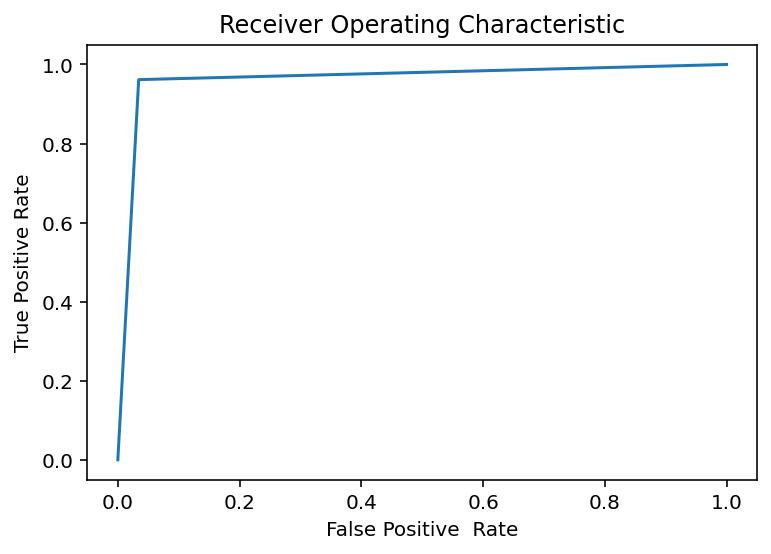

In [ ]:

from sklearn.metrics import roc_curve, auc
false_positive, true_positive,_= roc_curve(y_test_data,predictions["EssembleClasification"])
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive, true_positive)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive  Rate')
plt.show()

In [ ]:
accuracy_score(y_test_data,predictions["EssembleClasification"])

0.9636268480962973

# 5.6) Decision Tree

In [ ]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

In [ ]:
tree_model.fit(X_train_data_new,Y_train_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions["DecisionTree"] = tree_model.predict(x_test_data_new)

In [ ]:
accuracy_score(y_test_data,predictions["DecisionTree"])

0.9441318853853199

# 6) Evaluation

In [ ]:
# printing predections for test data
print(classification_report(y_test_data, predictions['EssembleClasification'], target_names = ["Good", "Bad"]))

              precision    recall  f1-score   support

        Good       0.96      0.97      0.96      3648
         Bad       0.97      0.96      0.97      3995

    accuracy                           0.96      7643
   macro avg       0.96      0.96      0.96      7643
weighted avg       0.96      0.96      0.96      7643



In [ ]:
# creating a matrix of data
matrix = confusion_matrix(y_test_data, predictions['EssembleClasification'])
matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

Text(0.5, 15.0, 'Predicted')

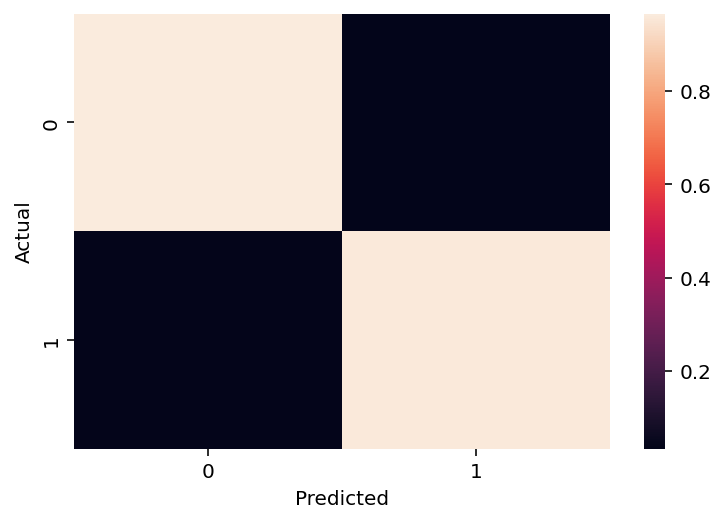

In [ ]:
# Printing heat map
sns.heatmap(matrix_normalized)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# printing predections
predictions

{'BernoulliNB': array([1, 0, 1, ..., 1, 0, 0]),
 'DecisionTree': array([0, 1, 1, ..., 1, 0, 1]),
 'EssembleClasification': array([0, 1, 1, ..., 1, 0, 0]),
 'LogisticRegression': array([0, 1, 1, ..., 1, 0, 0]),
 'Multinomial': array([0, 0, 1, ..., 1, 0, 0]),
 'SVM': array([0, 1, 1, ..., 1, 0, 0]),
 'knn': array([0, 1, 1, ..., 1, 1, 0])}

In [ ]:
# adding results in dictionary
print_results = {}
for k,v in predictions.items():
    print_results[k] = accuracy_score(y_test_data,v)

In [ ]:
# printing results
print_results

{'BernoulliNB': 0.8229752714902525,
 'DecisionTree': 0.9441318853853199,
 'EssembleClasification': 0.9636268480962973,
 'LogisticRegression': 0.9496271097736491,
 'Multinomial': 0.9379824676174278,
 'SVM': 0.9708229752714903,
 'knn': 0.7986392777705089}

In [ ]:
# taking data of model and accuracy
result_table=pd.DataFrame(list(print_results.items()), columns=["Model","Accuracy"])

In [ ]:
# printing accuracy table
result_table

,Model,Accuracy
0,LogisticRegression,0.949627
1,SVM,0.970823
2,Multinomial,0.937982
3,BernoulliNB,0.822975
4,knn,0.798639
5,EssembleClasification,0.963627
6,DecisionTree,0.944132


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

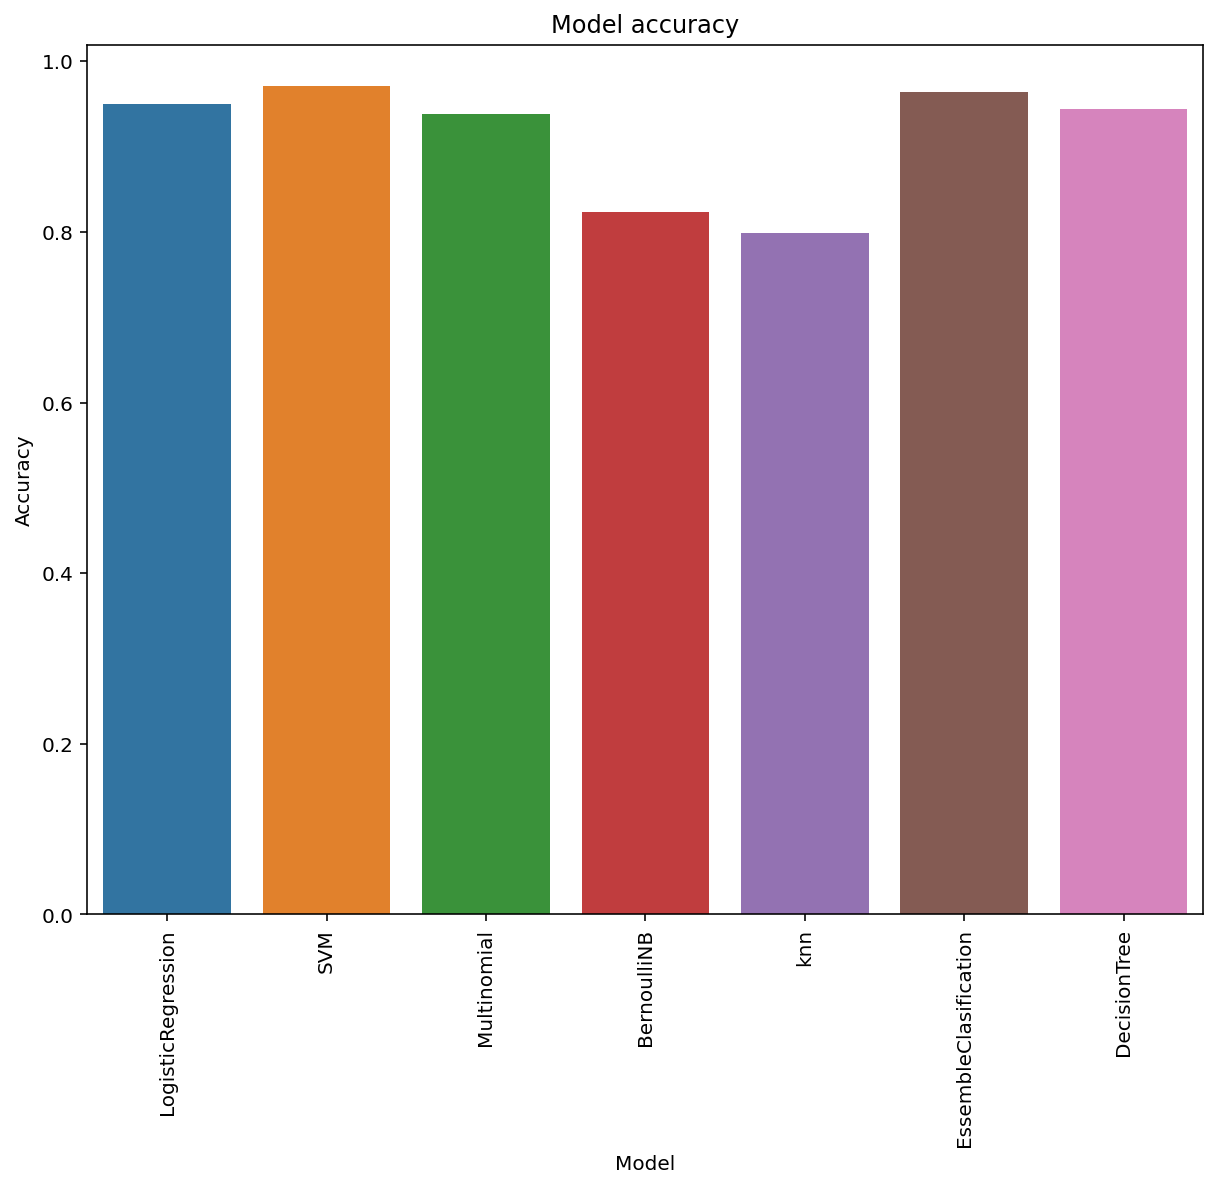

In [ ]:
# making bar graph formodel vs accuracy
plt.figure(figsize= (10,8))
sns.barplot(x = "Model", y = "Accuracy", data = result_table)
plt.title("Model accuracy")
plt.xticks(rotation = 90)